<a href="https://colab.research.google.com/github/RifkiSstwnn/22_Rifki-Setiawan_PCVK_Sem5_2024/blob/main/Rifki_Setiawan_22_3H_week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import cv2
from google.colab.patches import cv2_imshow
from skimage import io
import numpy as np
import matplotlib.pyplot as plt
import math
import os
import glob
from matplotlib.gridspec import GridSpec

In [2]:
import google.colab
google.colab.drive.mount('/content/drive')

Mounted at /content/drive


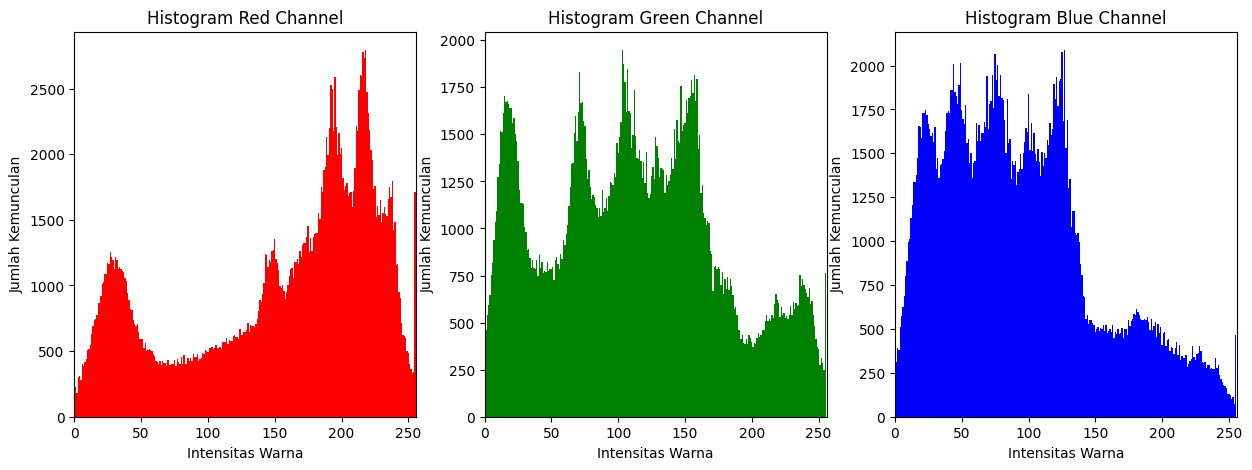

In [7]:
image = cv2.imread('/content/drive/MyDrive/PCVK/Images/lena.jpg')

# Konversi citra dari BGR ke RGB untuk penampilan yang benar di matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Langkah 3: Menghitung Jumlah Kemunculan Setiap Pixel Warna
# Hitung histogram untuk masing-masing kanal warna
colors = ('r', 'g', 'b')
channel_names = ['Red', 'Green', 'Blue']

# Buat plot terpisah untuk setiap kanal warna dalam diagram batang
plt.figure(figsize=(15, 5))

for i, (color, channel) in enumerate(zip(colors, channel_names)):
    plt.subplot(1, 3, i+1)  # 3 subplot untuk R, G, B
    hist, bins = np.histogram(image_rgb[:,:,i].flatten(), 256, [0,256])

    # Membuat histogram dalam bentuk diagram batang
    plt.bar(range(256), hist, color=color, width=1.0)
    plt.title(f"Histogram {channel} Channel")
    plt.xlabel("Intensitas Warna")
    plt.ylabel("Jumlah Kemunculan")
    plt.xlim([0,256])  # Batas intensitas warna dari 0 sampai 256

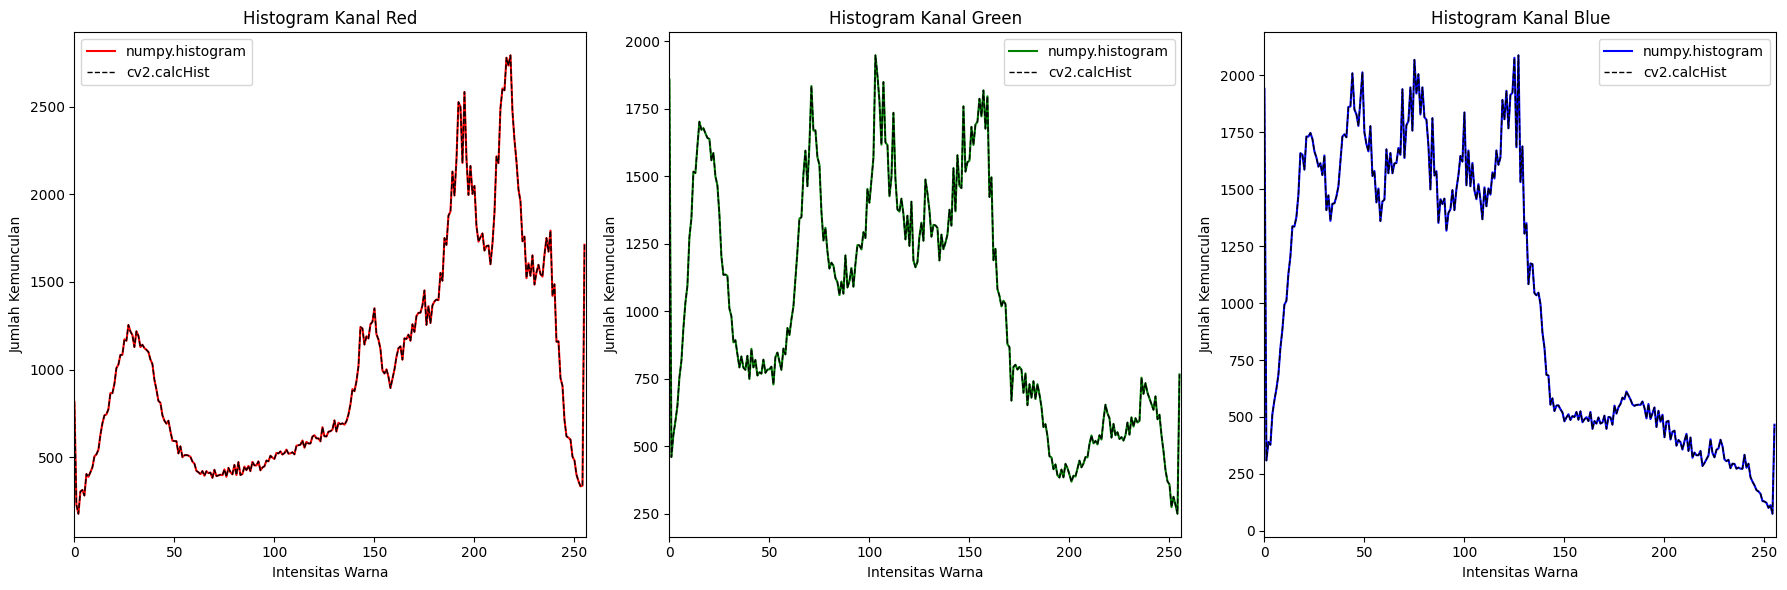

In [8]:
image_path = '/content/drive/MyDrive/PCVK/Images/lena.jpg'  # Ganti dengan path citra Anda
image = cv2.imread(image_path)

# Konversi citra dari BGR ke RGB untuk penampilan yang benar di matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Kanal warna
colors = ('Red', 'Green', 'Blue')
color_codes = ('r', 'g', 'b')

# Langkah 2: Hitung Histogram Menggunakan numpy.histogram
hist_np = {}
for i, color in enumerate(colors):
    hist, bins = np.histogram(image_rgb[:, :, i].flatten(), bins=256, range=[0, 256])
    hist_np[color] = hist

# Langkah 3: Hitung Histogram Menggunakan cv2.calcHist
hist_cv = {}
for i, color in enumerate(colors):
    hist = cv2.calcHist([image_rgb], [i], None, [256], [0, 256])
    hist_cv[color] = hist.flatten()  # Mengubah dari array 2D ke 1D

# Langkah 4: Plot dan Bandingkan Histogram
plt.figure(figsize=(18, 6))

for i, color in enumerate(colors):
    plt.subplot(1, 3, i+1)

    # Plot histogram menggunakan numpy.histogram
    plt.plot(hist_np[color], color=color_codes[i], label='numpy.histogram', linewidth=1.5)

    # Plot histogram menggunakan cv2.calcHist
    plt.plot(hist_cv[color], color='k', linestyle='--', label='cv2.calcHist', linewidth=1)

    plt.title(f'Histogram Kanal {color}')
    plt.xlabel('Intensitas Warna')
    plt.ylabel('Jumlah Kemunculan')
    plt.xlim([0, 256])
    plt.legend()

plt.tight_layout()
plt.show()

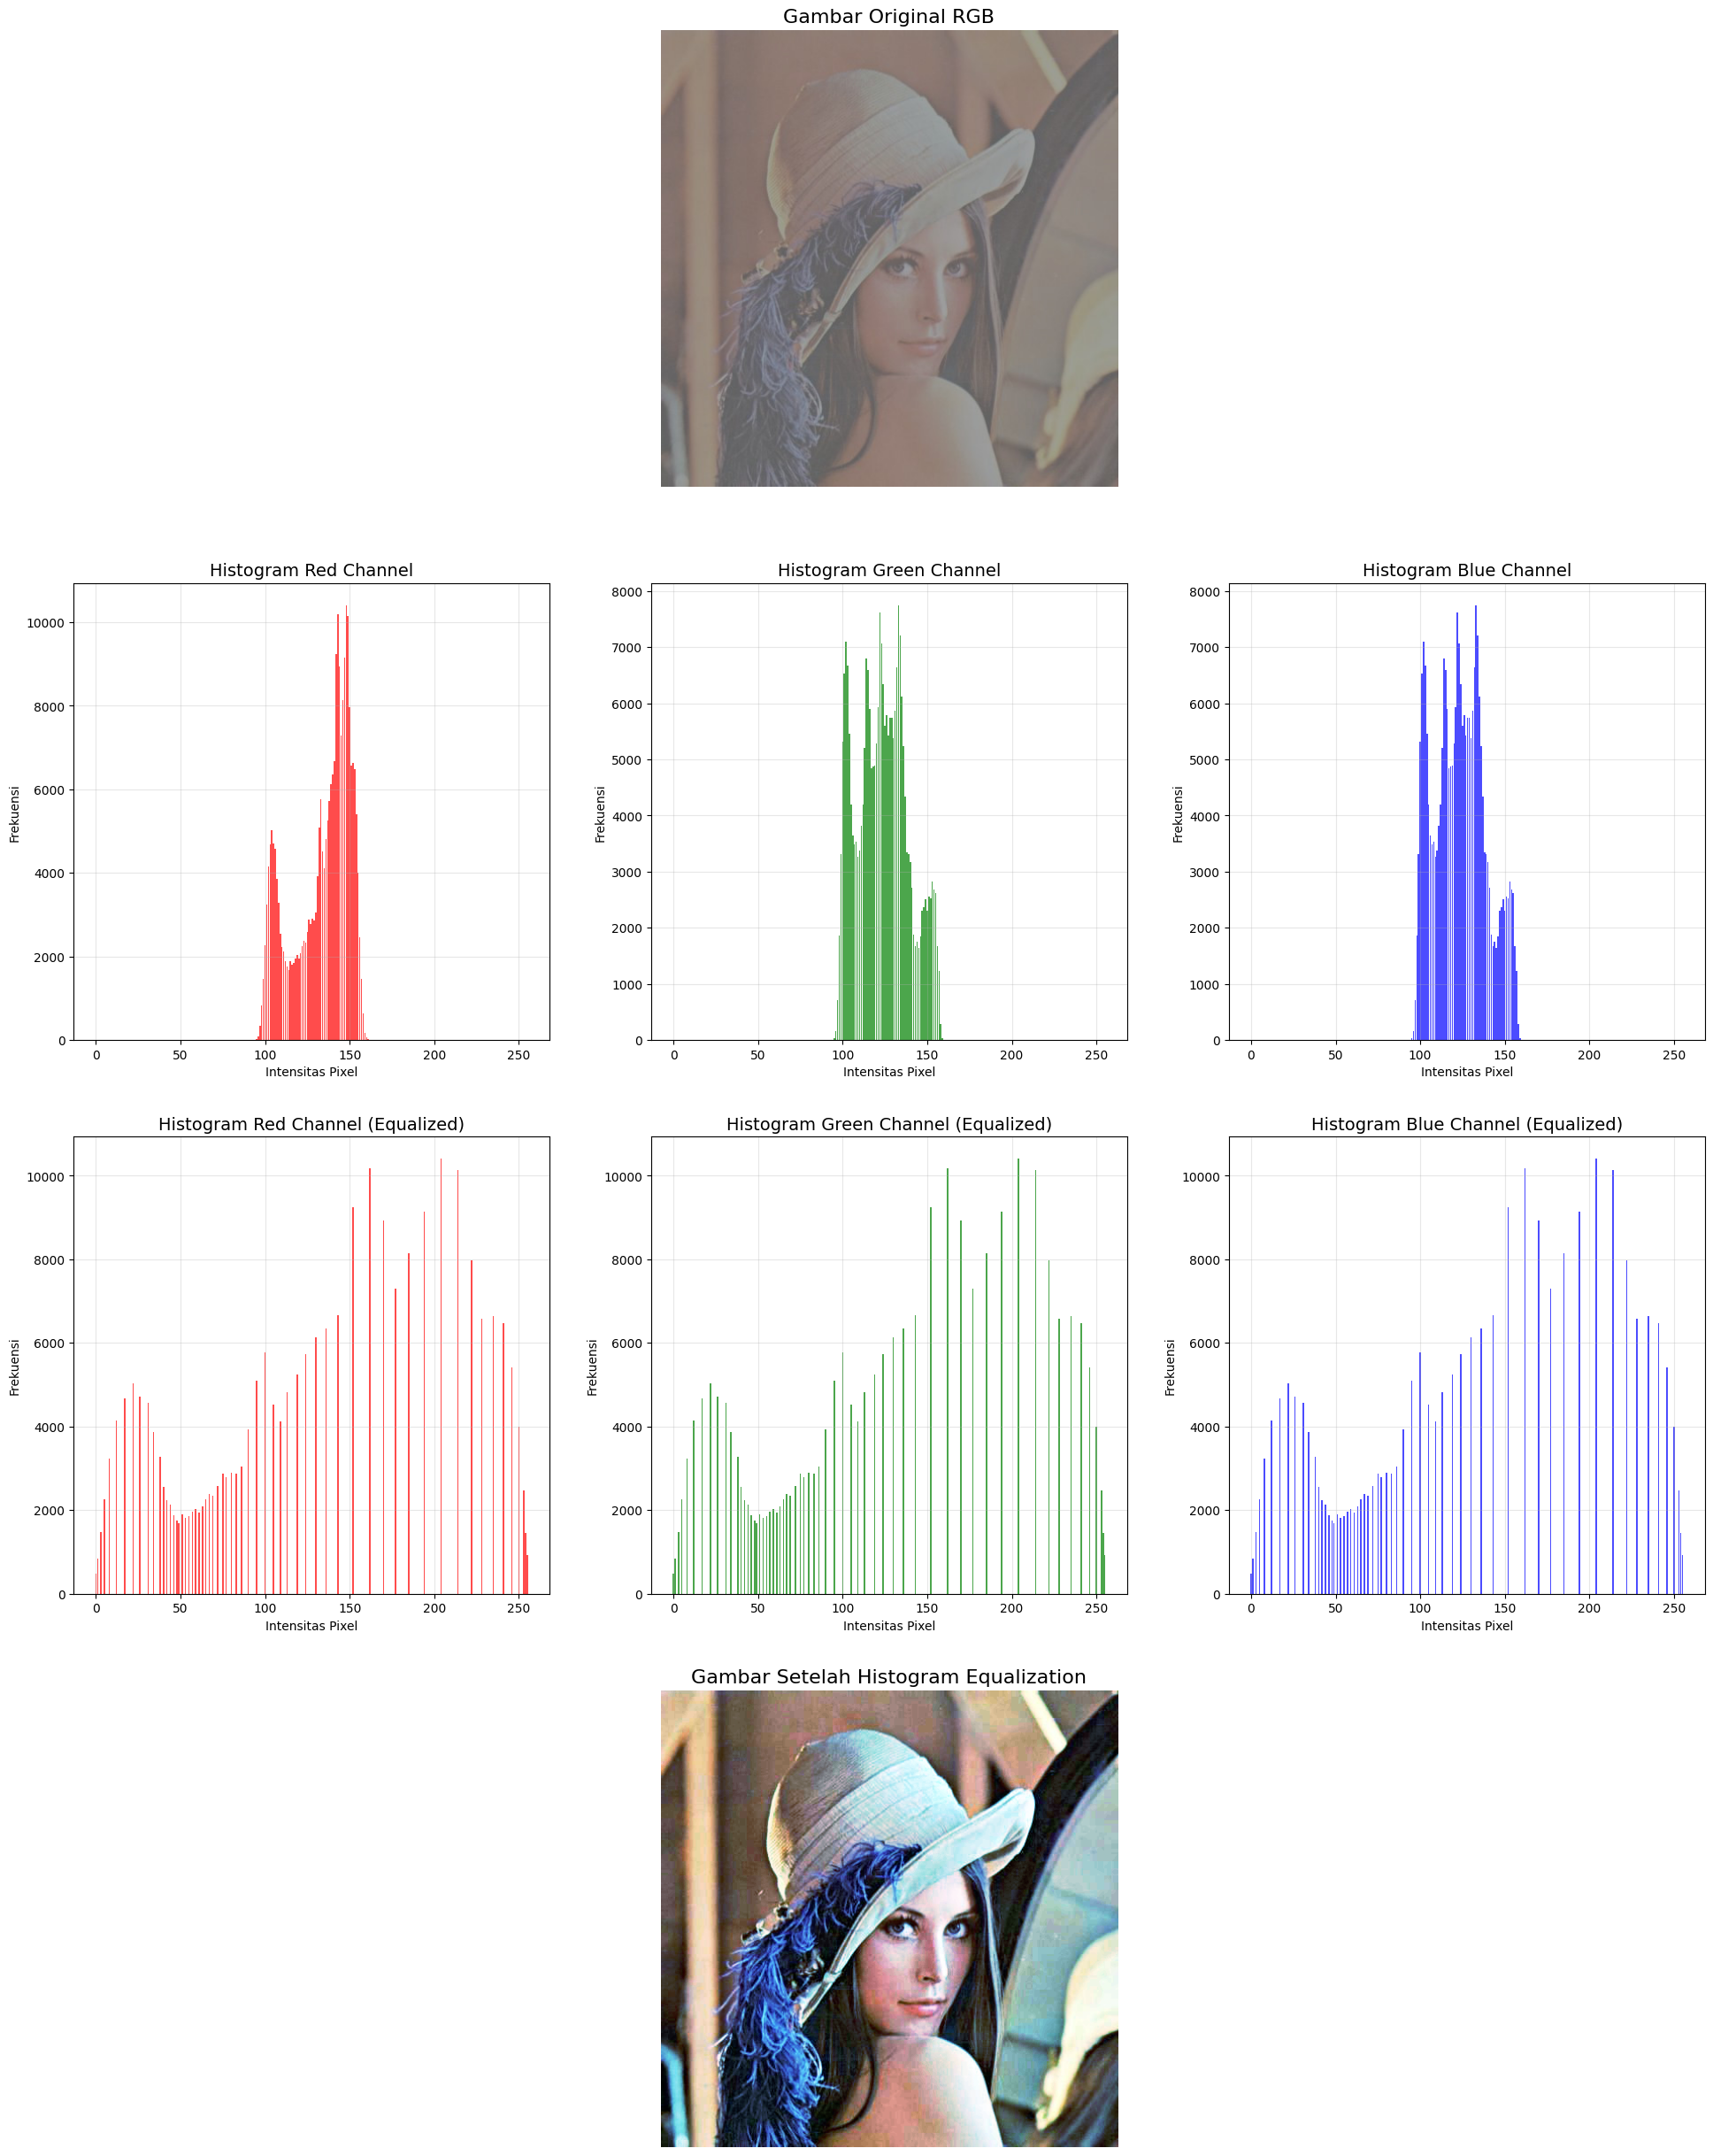

In [13]:
img = cv2.imread('/content/drive/MyDrive/PCVK/Images/lena_lc.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Konversi dari BGR ke RGB

# Langkah 2: Memisahkan Channel RGB
r, g, b = cv2.split(img)

# Langkah 3: Melakukan Histogram Equalization pada Setiap Channel
r_eq = cv2.equalizeHist(r)
g_eq = cv2.equalizeHist(g)
b_eq = cv2.equalizeHist(b)

# Langkah 4: Menggabungkan Kembali Channel yang Telah di-Equalize
img_eq = cv2.merge([r_eq, g_eq, b_eq])

# Langkah 5: Mengatur GridSpec untuk Tata Letak 4 Baris x 3 Kolom
plt.figure(figsize=(20, 25))
gs = GridSpec(4, 3, height_ratios=[1, 1, 1, 1])

# Baris Pertama: Gambar Original RGB (Mencakup Semua 3 Kolom)
ax0 = plt.subplot(gs[0, :])
ax0.imshow(img)
ax0.set_title('Gambar Original RGB', fontsize=16)
ax0.axis('off')

# Baris Kedua: Histogram Original RGB
ax1 = plt.subplot(gs[1, 0])
hist_r = cv2.calcHist([r], [0], None, [256], [0, 256])
ax1.bar(range(256), hist_r.flatten(), color='red', alpha=0.7) # Flatten hist_r to a 1D array
ax1.set_title('Histogram Red Channel', fontsize=14)
ax1.set_xlabel('Intensitas Pixel')
ax1.set_ylabel('Frekuensi')
ax1.grid(True, alpha=0.3)

ax2 = plt.subplot(gs[1, 1])
hist_g = cv2.calcHist([g], [0], None, [256], [0, 256])
ax2.bar(range(256), hist_g.flatten(), color='green', alpha=0.7) # Flatten hist_g to a 1D array
ax2.set_title('Histogram Green Channel', fontsize=14)
ax2.set_xlabel('Intensitas Pixel')
ax2.set_ylabel('Frekuensi')
ax2.grid(True, alpha=0.3)

ax3 = plt.subplot(gs[1, 2])
hist_b = cv2.calcHist([b], [0], None, [256], [0, 256])
ax3.bar(range(256), hist_g.flatten(), color='blue', alpha=0.7)
ax3.set_title('Histogram Blue Channel', fontsize=14)
ax3.set_xlabel('Intensitas Pixel')
ax3.set_ylabel('Frekuensi')
ax3.grid(True, alpha=0.3)

# Baris Ketiga: Histogram Equalized RGB
ax4 = plt.subplot(gs[2, 0])
hist_r_eq = cv2.calcHist([r_eq], [0], None, [256], [0, 256])
ax4.bar(range(256), hist_r_eq.flatten(), color='red', alpha=0.7)
ax4.set_title('Histogram Red Channel (Equalized)', fontsize=14)
ax4.set_xlabel('Intensitas Pixel')
ax4.set_ylabel('Frekuensi')
ax4.grid(True, alpha=0.3)

ax5 = plt.subplot(gs[2, 1])
hist_g_eq = cv2.calcHist([g_eq], [0], None, [256], [0, 256])
ax5.bar(range(256), hist_r_eq.flatten(), color='green', alpha=0.7)
ax5.set_title('Histogram Green Channel (Equalized)', fontsize=14)
ax5.set_xlabel('Intensitas Pixel')
ax5.set_ylabel('Frekuensi')
ax5.grid(True, alpha=0.3)

ax6 = plt.subplot(gs[2, 2])
hist_b_eq = cv2.calcHist([b_eq], [0], None, [256], [0, 256])
ax6.bar(range(256), hist_r_eq.flatten(), color='blue', alpha=0.7)
ax6.set_title('Histogram Blue Channel (Equalized)', fontsize=14)
ax6.set_xlabel('Intensitas Pixel')
ax6.set_ylabel('Frekuensi')
ax6.grid(True, alpha=0.3)

# Baris Keempat: Gambar Setelah Histogram Equalization (Mencakup Semua 3 Kolom)
ax7 = plt.subplot(gs[3, :])
ax7.imshow(img_eq)
ax7.set_title('Gambar Setelah Histogram Equalization', fontsize=16)
ax7.axis('off')

# Mengatur Layout dan Menampilkan Plot
plt.tight_layout(pad=3.0)
plt.show()

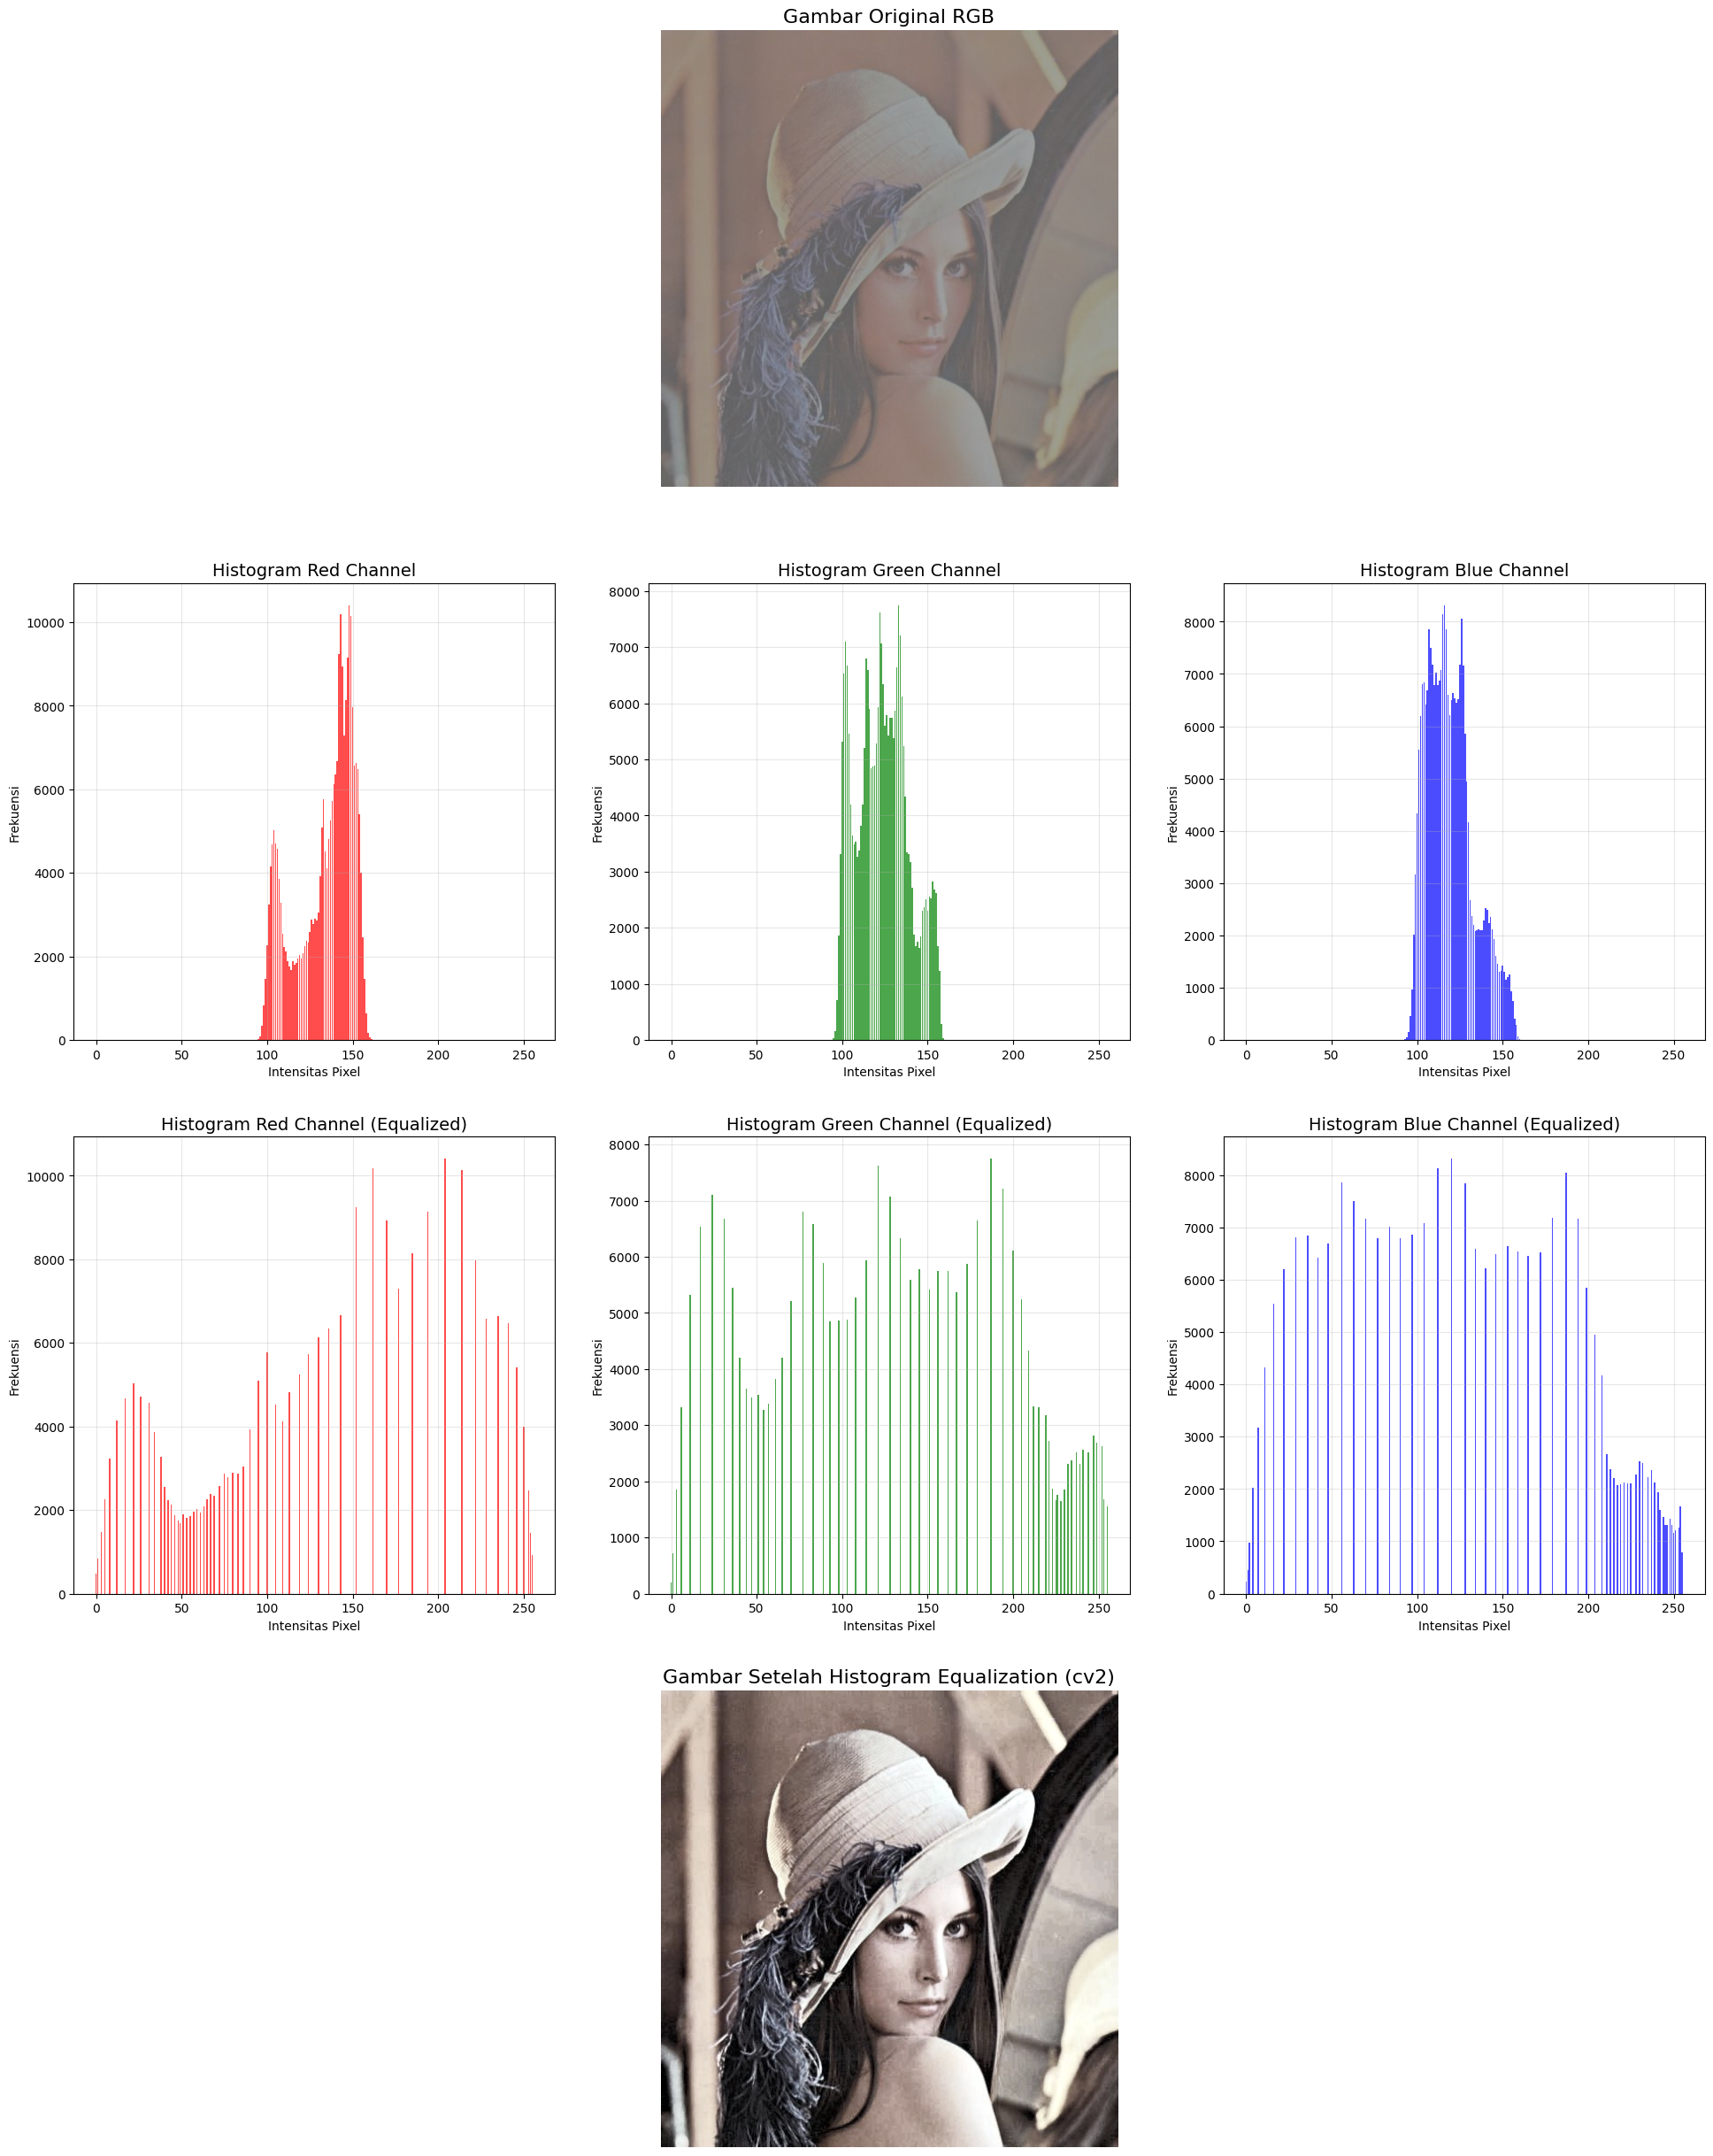

In [14]:
img = cv2.imread('/content/drive/MyDrive/PCVK/Images/lena_lc.jpg'  )
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Konversi dari BGR ke RGB

# Langkah 2: Konversi Citra ke YUV untuk Histogram Equalization
img_yuv = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)

# Langkah 3: Melakukan Histogram Equalization pada Channel Y
img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])  # Hanya pada channel Y

# Langkah 4: Mengonversi Kembali ke RGB
img_eq_cv2 = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2RGB)

# Langkah 5: Mengatur GridSpec untuk Tata Letak 4 Baris x 3 Kolom
plt.figure(figsize=(20, 25))
gs = GridSpec(4, 3, height_ratios=[1, 1, 1, 1])

# Baris Pertama: Gambar Original RGB (Mencakup Semua 3 Kolom)
ax0 = plt.subplot(gs[0, :])
ax0.imshow(img)
ax0.set_title('Gambar Original RGB', fontsize=16)
ax0.axis('off')

# Baris Kedua: Histogram Original RGB
ax1 = plt.subplot(gs[1, 0])
hist_r = cv2.calcHist([img[:,:,0]], [0], None, [256], [0, 256])
ax1.bar(range(256), hist_r.flatten(), color='red', alpha=0.7)
ax1.set_title('Histogram Red Channel', fontsize=14)
ax1.set_xlabel('Intensitas Pixel')
ax1.set_ylabel('Frekuensi')
ax1.grid(True, alpha=0.3)

ax2 = plt.subplot(gs[1, 1])
hist_g = cv2.calcHist([img[:,:,1]], [0], None, [256], [0, 256])
ax2.bar(range(256), hist_g.flatten(), color='green', alpha=0.7)
ax2.set_title('Histogram Green Channel', fontsize=14)
ax2.set_xlabel('Intensitas Pixel')
ax2.set_ylabel('Frekuensi')
ax2.grid(True, alpha=0.3)

ax3 = plt.subplot(gs[1, 2])
hist_b = cv2.calcHist([img[:,:,2]], [0], None, [256], [0, 256])
ax3.bar(range(256), hist_b.flatten(), color='blue', alpha=0.7)
ax3.set_title('Histogram Blue Channel', fontsize=14)
ax3.set_xlabel('Intensitas Pixel')
ax3.set_ylabel('Frekuensi')
ax3.grid(True, alpha=0.3)

# Baris Ketiga: Histogram Equalized RGB
ax4 = plt.subplot(gs[2, 0])
hist_r_eq = cv2.calcHist([img_eq], [0], None, [256], [0, 256])
ax4.bar(range(256), hist_r_eq.flatten(), color='red', alpha=0.7)
ax4.set_title('Histogram Red Channel (Equalized)', fontsize=14)
ax4.set_xlabel('Intensitas Pixel')
ax4.set_ylabel('Frekuensi')
ax4.grid(True, alpha=0.3)

ax5 = plt.subplot(gs[2, 1])
hist_g_eq = cv2.calcHist([img_eq], [1], None, [256], [0, 256])
ax5.bar(range(256), hist_g_eq.flatten(), color='green', alpha=0.7)
ax5.set_title('Histogram Green Channel (Equalized)', fontsize=14)
ax5.set_xlabel('Intensitas Pixel')
ax5.set_ylabel('Frekuensi')
ax5.grid(True, alpha=0.3)

ax6 = plt.subplot(gs[2, 2])
hist_b_eq = cv2.calcHist([img_eq], [2], None, [256], [0, 256])
ax6.bar(range(256), hist_b_eq.flatten(), color='blue', alpha=0.7)
ax6.set_title('Histogram Blue Channel (Equalized)', fontsize=14)
ax6.set_xlabel('Intensitas Pixel')
ax6.set_ylabel('Frekuensi')
ax6.grid(True, alpha=0.3)

# Baris Keempat: Gambar Setelah Histogram Equalization (Mencakup Semua 3 Kolom)
ax7 = plt.subplot(gs[3, :])
ax7.imshow(img_eq_cv2)
ax7.set_title('Gambar Setelah Histogram Equalization (cv2)', fontsize=16)
ax7.axis('off')

# Mengatur Layout dan Menampilkan Plot
plt.tight_layout(pad=3.0)
plt.show()

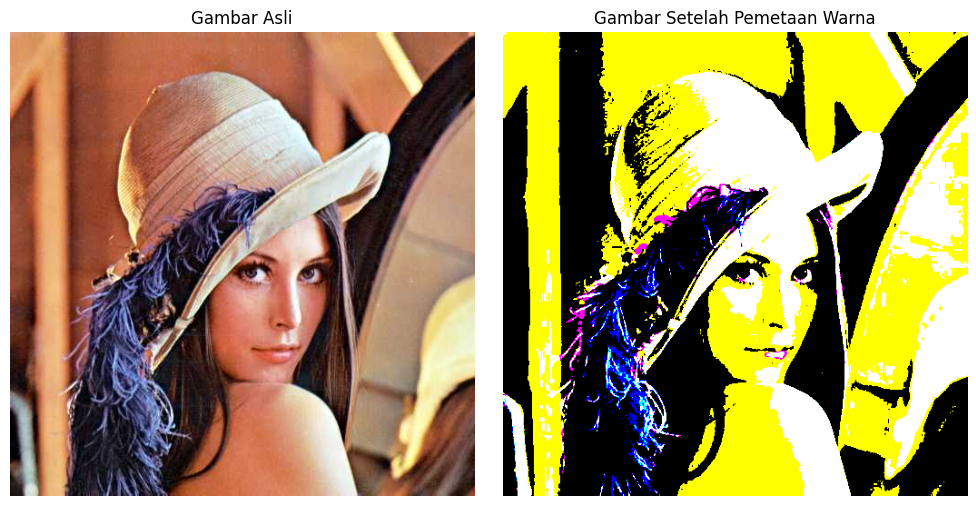

In [16]:
img = cv2.imread('/content/drive/MyDrive/PCVK/Images/lena.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Konversi dari BGR ke RGB

# Langkah 2: Definisikan Warna Target
colors = {
    'hitam': [0, 0, 0],
    'hijau': [0, 255, 0],
    'kuning': [255, 255, 0],
    'biru': [0, 0, 255],
    'cyan': [0, 255, 255],
    'magenta': [255, 0, 255],
    'putih': [255, 255, 255],
}

# Daftar warna target
color_list = np.array(list(colors.values()))

# Langkah 3: Fungsi untuk Mencari Warna Terdekat
def closest_color(rgb):
    # Hitung jarak Euclidean ke setiap warna
    distances = np.sqrt(np.sum((color_list - rgb) ** 2, axis=1))
    # Temukan indeks warna terdekat
    closest_index = np.argmin(distances)
    return color_list[closest_index]

# Langkah 4: Pemetaan Warna
height, width, _ = img.shape
output_img = np.zeros_like(img)

for i in range(height):
    for j in range(width):
        output_img[i, j] = closest_color(img[i, j])

# Langkah 5: Tampilkan Hasil
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Gambar Asli')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(output_img)
plt.title('Gambar Setelah Pemetaan Warna')
plt.axis('off')

plt.tight_layout()
plt.show()